In [4]:
from IPython.display import clear_output
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial.distance import cdist

## if you want that your code is reproducible and you get the same results
## you should set a seed. 
SEED = 42
np.random.seed(SEED)

## Gaussian Processes Regression

In this exercise session you are going to work and become comfortable with Guassian Processes (GPs), especially in Gaussian Process regression.

The notebook is structured as follows:

1- You should implement the squared-exponential kernel function and understand the effects of the hyperparameters on the covariance matrix that it creates.

2- Then you should implement both noise-free and noisy GP regression for a really simple toy dataset

3- As last exercise, you should be ready to apply noisy-GP regression in a more realistic dataset and you should also optimize the parameters of the GP. 

### Kernel functions

From the lecture and the lecture notes, you have seen that the Gaussain Processes assume that the target $y$'s are sampled from a Gaussian distribution. For simplicity, if we condiser our data centered, we assume a zero-mean Gaussian distribution:

$$\begin{bmatrix}y_1 \\ y_2\\ \vdots \\ y_n \end{bmatrix} \sim \mathcal{N}(0, \Sigma)$$

The trick of GPs is that the covariance matrix between the target $y$'s depends on the input observations $\mathbf{x}$. This means that each entry of the covariance matrix is given by:

$$\Sigma_{ij} = \text{Cov}(y_i,y_j)=\text{Cov}(f(x_i),f(x_j))=k(x_i,x_j)$$

where $k(x_i,x_j)$ is the *kernel* or *covariance function*.

We have only introduced one kernel, although there are different choices for a kernel and if in the future you are going to work with GPs in the future. We will focus only on the *Squared-Exponential* (SE) kernel, defined by:

$$k_{SE}(x_i,x_j)= \sigma^2 \exp \left(-\frac{\left\|x_i - x_k \right\|^2}{2l^2}\right)$$

that has two parameters: the lengthscale $l$ and output variance $\sigma^2$.

Tasks:

**1-** You should implement a function `kernel(set1, set2, lengthscale, output_variance)`. Once you call this function it should return a matrix that contains the pairwise evaluation of the kernel. 
    **HINT**: you should start by computing all the pair-wise distances, a way to get it is to write the expand form of $\left\|x_i - x_k \right\|^2$, otherwise you should look at the function `scipy.spatial.distance.cdist`. Then you use them to compute the kernel.
    
**2-** Try to apply the function using `lengthscale = 1` and `output_variance = 1` to a toy set and look at the plot. You should expect the value $1$ along the diagonal and that closer points are higher correlated than further points. (If you use `plt.colorbar()`, you will get the mapping from color to numbers)

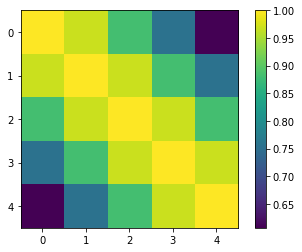

In [18]:
## IMPLEMENT THE KERNEL FUNCTION
def squared_exponential_kernel(x, y, lengthscale, variance):
    # COMPUTE ALL THE PAIRWISE DISTANCES, size: NxM
    sqdist = cdist(x.reshape(-1, 1), y.reshape(-1, 1), 'sqeuclidean')
    # COMPUTE THE KENEL, this should also be NxM
    k = variance * np.exp(-0.5 * sqdist * (1/lengthscale**2))
    return k



## TOY DATASET
temp_x = np.linspace(0,1,5)

# we apply the kernel and get the covariance
## DEFINE LENGTHSCALE AND OUTPUT_VARIANCE
temp_lengthscale = 1
temp_out_variance = 1

temp_cov = squared_exponential_kernel(temp_x, temp_x, temp_lengthscale, temp_out_variance)

# plot
plt.imshow(temp_cov)
plt.colorbar()
plt.show()

### Sampling from the prior distribution

At this point, as you have seen from the lecture notes, you should know how sample from the prior distribution of our Gaussian Process. We are going to resume the process here. You can start by defining $N_*$ point on the $x$-axis, which can technically be considered as test point since you do not know their target. Since we have no trainign points $(x_i,y_i)_{i=1,\dotsc,N}$, we compute the covarince matrix $\Sigma_{**}$ of the distribution using only the $N_*$ points. This will reuslt in a $N_* \times N_*$ matrix. If you define your prior distribution as $\mathcal{N}(\mathbf{0}, \Sigma_{**})$ and you sample 5 times from it you will get 5 possible values for each point $x_*$ in the test set:

$$\begin{bmatrix}y_{*,1} \\ y_{*,2}\\ \vdots \\ y_{*,N_*} \end{bmatrix} \sim \mathcal{N}(0, \Sigma_{**})$$


Tasks:
    
**1-** Create the covariance matrix $\Sigma_{**}$ using the kernel function you implemented before. (Before doing this step be sure that the function you implemented actually works as expected!) As starting point, you can use `lengthscale = 1` and `output_variance = 1` as kernel parameters.

**2-** Create the distribution $\mathcal{N}(\mathbf{0}, \Sigma_{**})$ and sample $5$ samples from it (**HINT**: you can sample using the following function `np.random.multivariate_normal`). Otherwise if do not wish to rely on this function, sampling from a centered, uncorrelated, homoscedastic Normal with scalar variance of 1 and left multiplying with the matrix squareroot/Cholesky factorization of $\Sigma$ and adding the mean will do the same (convince yourself that this is true). Create and show the following plots (most code for the plots is given):
1. The covariance matrix as you did before
2. The prior distribution: for each point $x_*$ plot its mean and the two-standard deviation interval. (**HINT**: to get the standard deviation of each point you should take the square-root of the elements in the diagonal, look at the function `np.diag`. To plot a shaded area for the standard deviation you can use the following function `plt.gca().fill_between(Xtest.flat, mu.reshape(-1) - 2 * var, mu.reshape(-1) + 2 * var,  color='lightblue', alpha=0.5)` where obsviously you should substitute the variables \texttt{Xtest, mu, var} with the name that you have chosen.
3. Plot the different samples. If you use different colors the resuts looks better and clearer.

**3-** Try to understand the effect of the lengthscale and the output variance. Repeat the steps above selecting different values for the two hyperparameters.

(5, 50)


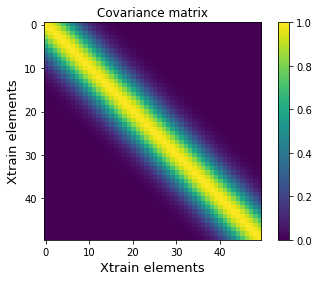

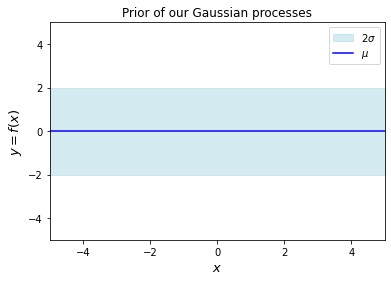

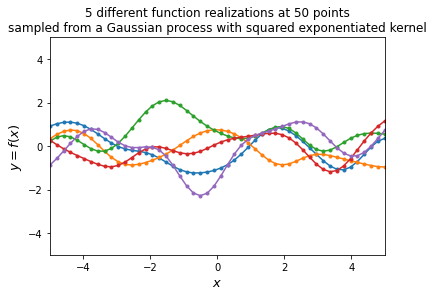

In [20]:
# TEST SET (OR RANGE OF INTEREST)
npoints = 50
Xtest = np.linspace(-5,5,npoints)

# mean and covariance of the distribution
# we asusme zero mean, so centered data
mu = np.zeros(npoints)

# since we are using linspace between -5 and 5, our data is already centered, i.e. the mean
# of Xtest is zero. You can check with np.mean(Xtest)
## COMPUTE THE COVARIANCE MATRIX
lengthscale = 1 
output_var = 1
covariance = squared_exponential_kernel(Xtest,Xtest,lengthscale,output_var)

## GET THE STANDARD DEVIATION FROM THE COVARIANCE
std = np.sqrt(np.diag(covariance))

# samples from the prior distribution
n_samples = 5

## SAMPLE N_SAMPLES POINTS FROM THE PRIOR DISTRIBUTION
ys = np.random.multivariate_normal(
    mean=mu, cov=covariance, 
    size=n_samples)

print(ys.shape)


#######
# the 3 plots we need

# we can plot the covariance matrix
plt.imshow(covariance)
plt.colorbar()
plt.xlabel('Xtrain elements', fontsize=13)
plt.ylabel('Xtrain elements', fontsize=13)
plt.title('Covariance matrix')
plt.show()

# the prior distribution
plt.gca().fill_between(Xtest.flat, mu - 2 * std, mu + 2 * std,  color='lightblue', alpha=0.5, label = r"$2\sigma$")
plt.plot(Xtest, mu, 'blue', label = r"$\mu$")
plt.xlabel('$x$', fontsize=13)
plt.ylabel('$y = f(x)$', fontsize=13)
plt.title(('Prior of our Gaussian processes'))
plt.legend()
plt.axis([-5, 5, -5, 5])
plt.show()

# samples from the prior
plt.figure(figsize=(6, 4))
for i in range(n_samples):
    plt.plot(Xtest, ys[i], linestyle='-', marker='o', markersize=3)
plt.xlabel('$x$', fontsize=13)
plt.ylabel('$y = f(x)$', fontsize=13)
plt.title((
    '5 different function realizations at 50 points\n'
    'sampled from a Gaussian process with squared exponentiated kernel'))
plt.axis([-5, 5, -5, 5])
plt.show()

## Samples from the posterior

The goal of Gaussian Process is not to get samples from the prior, but instead, we want to use the knowledge given by the training data about the underlying function to be able to make predictions for new, unseen test points. In the next exercises we are going to understand how to use training points to get information about the posisble regression fucntions that we are trying to model, and as next natural step, how to make predictions for test points.

### Noise-free observations
We start by considering the training observations we get to be noise-free. This is an unrealistic assumption to make in a real-world scenario, but at the same time, it makes the computation of the posterior easier to understand. In a more analytical way we are considering that the targets we recorded are exactly the underlying function that we want to learn, i.e. $y = f(\mathbf{x},\mathbf{w})$, where the usual zero-mean normal error $\epsilon$ does not appear. 

Since the prior assumption of having a zero-mean distribution, we should standardize our data. This way we get also that the variance is 1. As you have read in the lecture notes, this would help in preventing numerical issues in computing the posterior distribution. The starting point is to deifne the joint distribution of the training observations $\mathbf{y}$ and the test outputs $\mathbf{y}_*$ we want to observe as:

$$\begin{bmatrix} \mathbf{y} \\ \mathbf{y}_* \end{bmatrix} \sim \left( \mathbf{0}, \begin{bmatrix}
    K(\mathbf{X},\mathbf{X}) & K(\mathbf{X}, \mathbf{X_*})\\
    K(\mathbf{X_*},\mathbf{X}) & K(\mathbf{X_*}, \mathbf{X_*})
    \end{bmatrix}{}\right) $$
    
where $\mathbf{X}$ is the matrix containing the training points $\mathbf{x}_i$ and $\mathbf{X_*}$ is the test set. If there are $N$ training points and $N_*$ test points we have that: 

- $K(X,X)$ is the $N \times N$ matrix of the kernel evaluated at all training points pairs, 

- $K(X,X_*)$ is the $N \times N_*$ matrix with the kernels evaluated at all pairs created by combining the training points and test points. 

- $K(X_*,X_*)$ contains the $N_* \times N_*$ elements obtained by computing the covariance functions to all pairs of test points.

We are interested in the conditional probability $\mathbf{y}_*|\mathbf{y}$, which is given by $p(\mathbf{y_*}|\mathbf{y}, \mathbf{X}, \mathbf{X_*})$. We know how to compute the conditional probability of a multivariate Gaussian. We have seen it in the exercise session 1. If we use the same rules here, we get:

\begin{align}
\begin{split}
    p(\mathbf{y_*}|\mathbf{y}, \mathbf{X}, \mathbf{X_*}) &= \mathcal{N}(\mu_{\mathbf{y_*}|\mathbf{y}}, \mathbf{\Sigma}_{\mathbf{y_*}|\mathbf{y}})\\
    \mu_{\mathbf{y_*}|\mathbf{y}} &= K(\mathbf{X_*}, \mathbf{X}) K(\mathbf{X},\mathbf{X})^{-1}\mathbf{y}\\
    \mathbf{\Sigma}_{\mathbf{y_*}|\mathbf{y}} &= K(\mathbf{X_*}, \mathbf{X_*}) - K(\mathbf{X_*},\mathbf{X})K(\mathbf{X},\mathbf{X})^{-1}K(\mathbf{X}, \mathbf{X_*})
\end{split}
\end{align}

To make the posterior more compact, we can define
- $\mathbf{K} = K(\mathbf{X},\mathbf{X})$,
- $\mathbf{K_*} = K(\mathbf{X},\mathbf{X_*})$ 
- $\mathbf{K_{**}}=K(\mathbf{X_*}, \mathbf{X_*})$

and the posterior becomes
\begin{align}
\begin{split}
    p(\mathbf{y_*}|\mathbf{y}, \mathbf{X}, \mathbf{X_*}) &= \mathcal{N}(\mu_{\mathbf{y_*}|\mathbf{y}}, \mathbf{\Sigma}_{\mathbf{y_*}|\mathbf{y}})\\
    \mu_{\mathbf{y_*}|\mathbf{y}} &= \mathbf{K_*}^T \mathbf{K}^{-1}\mathbf{y}\\
    \mathbf{\Sigma}_{\mathbf{y_*}|\mathbf{y}} &= \mathbf{K_{**}} - \mathbf{K_*}^T\mathbf{K}^{-1}\mathbf{K_*}
\end{split}
\end{align}

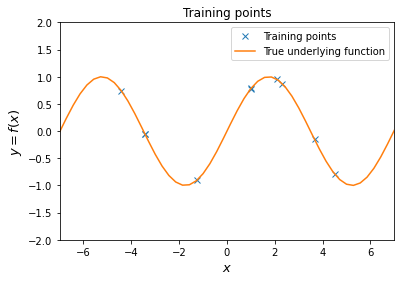

In [21]:
## TOY DATASET CREATION - DO NOT CHANGE IT
## NOISE-FREE GP
np.random.seed(SEED)

## we start creating a simple dataset
# true unknown function we are trying to approximate
f = lambda x: np.sin(0.9*x).flatten()

N = 10 # number of training points

# create the dataset
Xtrain = np.random.uniform(-5, 5, size=(N,1))
ytrain = f(Xtrain) 

# we shoul create a test set, which are point in which we want to evaluate the function 
# with a mean and a variance
Xtest = np.linspace(-7,7, npoints).reshape(-1,1)

## we can plot the training points
plt.plot(Xtrain, ytrain, 'x', label='Training points')
plt.plot(Xtest, f(Xtest), '-', label = 'True underlying function')
plt.xlabel('$x$', fontsize=13)
plt.ylabel('$y = f(x)$', fontsize=13)
plt.title('Training points')
plt.axis([-7, 7, -2, 2])
plt.legend()
plt.show()

#### Noise-Free GP regression algorithm
To compute efficiently the posterior that we are interested in, you can follow step-by-step this recipe:

1. Start computing $\mathbf{K} = K(\mathbf{X},\mathbf{X})$, $\mathbf{K_*} = K(\mathbf{X},\mathbf{X_*})$ and $\mathbf{K_{**}}=K(\mathbf{X_*},\mathbf{X_*})$
2. $\mathbf{L} = \text{Cholesky}(\mathbf{K})$
3. $\mathbf{\alpha}= \mathbf{L}^T \backslash (\mathbf{L} \backslash \mathbf{y})$
4. $\mu_{\mathbf{y_*}|\mathbf{y}} = \mathbf{K_*}^T \mathbf{\alpha}$
5. $\mathbf{v} = \mathbf{L}\backslash \mathbf{K_*}$
6. $\mathbf{\Sigma}_{\mathbf{y_*}|\mathbf{y}} = \mathbf{K_{**}} - \mathbf{v}^T\mathbf{v}$

where the backslash symbol $\backslash$ means that we have to solve a linear system.

<font color='blue'> Tasks:
1. Following the algorithm described above, you should compute the posterior distribution. Plot the mean function and the 2-standard deviation interval. Remember that you should choose the hyperparameters for the kernel. (**HINT**: for the Cholesky decomposition look at the NumPy function `np.linalg.cholesky`. To solve a linear system look at `np.linalg.solve`).
2. Sample 5 functions from the posterior and plot them.

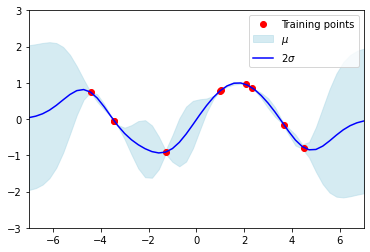

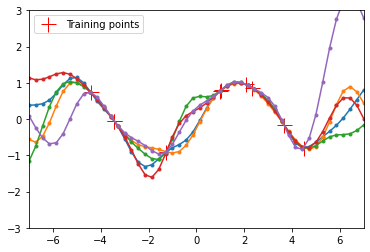

In [22]:
# we follow step-by-step the algorithm 
lengthscale = 1
kernel_variance = 1


# we start computing the kernels (I am using s instead of * in the kernel variable names)
K = squared_exponential_kernel(Xtrain, Xtrain, lengthscale, kernel_variance)                       # n_train x n_train
Ks = squared_exponential_kernel(Xtrain, Xtest, lengthscale, kernel_variance)                      # n_train x n_test
Kss = squared_exponential_kernel(Xtest, Xtest, lengthscale, kernel_variance)                     # n_test x n_test

# compute the cholesky decomposition
L = np.linalg.cholesky(K)

# compute alpha
alpha = np.linalg.solve(L.T, np.linalg.solve(L,ytrain))

# compute the mean function
mu = Ks.T @ alpha

# compute v
v = np.linalg.solve(L, Ks)

# compute the covariance
covariance = Kss - (v.T @ v)

# we get the standard deviation from the covariance matrix
std = np.sqrt(np.diag(covariance))


## now we can plot the mean function with the standard deviation intervals
plt.plot(Xtrain, ytrain, 'ro', label='Training points')
plt.gca().fill_between(Xtest.flat, mu - 2 * std, mu + 2 * std,  color='lightblue', alpha=0.5, label=r"$\mu$")
plt.plot(Xtest, mu, 'blue', label=r"$2\sigma$")
plt.axis([-7, 7, -3, 3])
plt.legend()
plt.show() 


## SAMPLE FROM THE POSTERIOR
samples_from_the_posterior =  np.random.multivariate_normal(
    mean=mu.reshape(-1), cov=covariance, 
    size=n_samples) 

# PLOT THEM
plt.plot(Xtrain, ytrain, 'r+', ms=15, label='Training points')
#plt.gca().fill_between(Xtest.flat, mu - 2 * var, mu + 2 * var, color='lightblue', alpha=0.5)
#plt.plot(Xtest, mu, 'blue')
for sample_id in range(n_samples):
    plt.plot(Xtest, samples_from_the_posterior[sample_id], linestyle='-', marker='o', markersize=3)
plt.axis([-7, 7, -3, 3])
plt.legend()
plt.show()  

In [6]:
K.shape

(10, 10)

### Noisy observations

The next exercise is very similar to the one you just did, but this will be the usual way to use Gaussian Porcess in a real-world setting. In this case we are going to consider that the targets $y$ we observed and registered as training set are noisy. Therefore we have: $y = f(\mathbf{x},\mathbf{w})+\epsilon$, where $\epsilon \sim \mathcal{N}(\mathbf{0},\sigma_n^2)$ is the additive independent identically distributed Gaussian noise.

Therefore, when we are going to define the joint distribution over the training observations $\mathbf{y}$ and the test observations $y_*$, we should keep the variance of the additive noise into account. The prior on the noisy training observations becomes:

$$\Sigma_{ij} = \text{Cov}(y_i,y_j) = k(\mathbf{x}_i, \mathbf{x}_j) + \sigma_n^2 \delta_{ij}$$

where with $\Sigma_{ij}$ we are denoting the entry $i,j$ of the $K(\mathbf{X},\mathbf{X})$ covariance matrix. In addition to that, the $\delta_{ij}$ is a Kronecker delta which is equal to $1$ if and only if $i=j$, and zero otherwise.

Therefore we can write in matrix notation:

$$ \text{Cov}(\mathbf{y}) = K(\mathbf{X},\mathbf{X}) + \sigma_n^2 \mathbf{I}$$

and using this result, we have that the joint distribution can be defined ad:

\begin{align}
    \begin{bmatrix}
    \mathbf{y}\\
    \mathbf{y_*}
    \end{bmatrix} \sim \left( \mathbf{0}, \begin{bmatrix}
    K(\mathbf{X},\mathbf{X})+ \sigma_n^2 \mathbf{I} & K(\mathbf{X}, \mathbf{X_*})\\
    K(\mathbf{X_*},\mathbf{X}) & K(\mathbf{X_*}, \mathbf{X_*})
    \end{bmatrix}{}\right)
\end{align}

Since we usually do not know the noise variance of our data, we have that $\sigma_n^2$ is another hyperparameter. As before, we are interested in the conditional distribution $\mathbf{y}_*|\mathbf{y}$, which is given by $p(\mathbf{y_*}|\mathbf{y}, \mathbf{X}, \mathbf{X_*})$. If we compute it, we get:

\begin{align}
\begin{split}
    p(\mathbf{y_*}|\mathbf{y}, \mathbf{X}, \mathbf{X_*}) &= \mathcal{N}(\mu_{\mathbf{y_*}|\mathbf{y}}, \mathbf{\Sigma}_{\mathbf{y_*}|\mathbf{y}})\\
    \mu_{\mathbf{y_*}|\mathbf{y}} &= K(\mathbf{X}, \mathbf{X_*}) [K(\mathbf{X},\mathbf{X})+ \sigma_n^2 \mathbf{I}]^{-1}\mathbf{y}\\
    \mathbf{\Sigma}_{\mathbf{y_*}|\mathbf{y}} &= K(\mathbf{X_*}, \mathbf{X_*}) - K(\mathbf{X_*},\mathbf{X})[K(\mathbf{X},\mathbf{X})+ \sigma_n^2 \mathbf{I}]^{-1}K(\mathbf{X}, \mathbf{X_*})
\end{split}
\end{align}

and using the same compact definition we have defined above, we get:

\begin{align}
\begin{split}
    p(\mathbf{y_*}|\mathbf{y}, \mathbf{X}, \mathbf{X_*}) &= \mathcal{N}(\mu_{\mathbf{y_*}|\mathbf{y}}, \mathbf{\Sigma}_{\mathbf{y_*}|\mathbf{y}})\\
    \mu_{\mathbf{y_*}|\mathbf{y}} &= \mathbf{K_*}^T [\mathbf{K} + \sigma_n^2 \mathbf{I}]^{-1}\mathbf{y}\\
    \mathbf{\Sigma}_{\mathbf{y_*}|\mathbf{y}} &= \mathbf{K_{**}} - \mathbf{K_*}^T[\mathbf{K}+ \sigma_n^2 \mathbf{I}]^{-1}\mathbf{K_*}
\end{split}
\end{align}

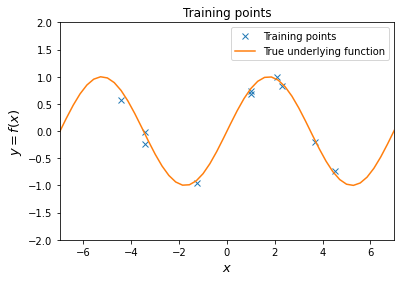

In [7]:
## TOY DATASET CREATION - DO NOT CHANGE IT
## NOISY-GP regression
np.random.seed(SEED)

## we start creating a simple dataset
# true unknown function we are trying to approximate
f = lambda x: np.sin(0.9*x).flatten()

N = 10 # number of training points
noise_variance =  0.1 # we assume noisy data

# create the dataset
Xtrain = np.random.uniform(-5, 5, size=(N,1))
ytrain = f(Xtrain) + noise_variance*np.random.randn(N)

# we shoul create a test set, which are point in which we want to evaluate the function 
# with a mean and a variance
Xtest = np.linspace(-7,7, npoints).reshape(-1,1)

## we can plot the training points
plt.plot(Xtrain, ytrain, 'x', label='Training points')
plt.plot(Xtest, f(Xtest), '-', label = 'True underlying function')
plt.xlabel('$x$', fontsize=13)
plt.ylabel('$y = f(x)$', fontsize=13)
plt.title('Training points')
plt.axis([-7, 7, -2, 2])
plt.legend()
plt.show()

#### Noisy GP regression algorithm
To compute efficiently the posterior that we are interested in, you can follow step-by-step this recipe:

1. Start computing $\mathbf{K} = K(\mathbf{X},\mathbf{X})$, $\mathbf{K_*} = K(\mathbf{X},\mathbf{X_*})$ and $\mathbf{K_{**}}=K(\mathbf{X_*},\mathbf{X_*})$
2. $\mathbf{L} = \text{Cholesky}([\mathbf{K} + \sigma_n^2 \mathbf{I}])$
3. $\mathbf{\alpha}= \mathbf{L}^T \backslash (\mathbf{L} \backslash \mathbf{y})$
4. $\mu_{\mathbf{y_*}|\mathbf{y}} = \mathbf{K_*}^T \mathbf{\alpha}$
5. $\mathbf{v} = \mathbf{L}\backslash \mathbf{K_*}$
6. $\mathbf{\Sigma}_{\mathbf{y_*}|\mathbf{y}} = \mathbf{K_{**}} - \mathbf{v}^T\mathbf{v}$

where the backslash symbol $\backslash$ means that we have to solve a linear system.

<font color='blue'> Tasks:
1. Following the algorithm described above, you should compute the posterior distribution. Plot the mean function and the 2-standard deviation interval. Remember that you should choose the hyperparameters for the kernel and this time you have also to choose the value for the noise variance. (**HINT**: for the Cholesky decomposition look at the NumPy function `np.linalg.cholesky`. To solve a linear system look at `np.linalg.solve`. To implement $ \sigma_n^2 \mathbf{I}$ you should check `np.identity`).
2. Sample 5 functions from the posterior and plot them.
3. repeat the same procedure for different values of the hyperparameters. What happens?

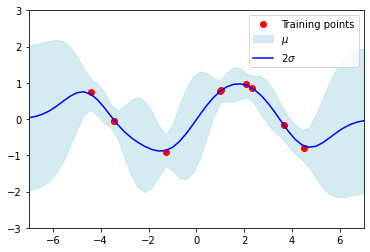

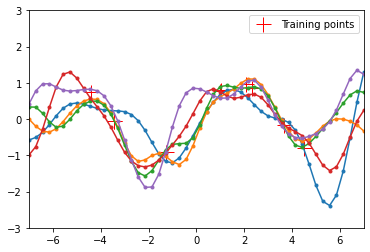

In [24]:
# we follow step-by-step the algorithm 
lengthscale = 1
kernel_variance = 1
# this time we have to consider a new hyperparameters: the noise variance
noise_variance = 0.05

# we start computing the kernels (I am using s instead of * in the kernel variable names)
K = squared_exponential_kernel(Xtrain, Xtrain, lengthscale, kernel_variance)
Ks = squared_exponential_kernel(Xtrain, Xtest, lengthscale, kernel_variance)
Kss = squared_exponential_kernel(Xtest, Xtest, lengthscale, kernel_variance)

# compute the cholesky decomposition
L = np.linalg.cholesky(K + noise_variance * np.identity(len(Xtrain)))

# compute alpha
alpha = np.linalg.solve(L.T, np.linalg.solve(L,ytrain))

# compute the mean function
mu = Ks.T @ alpha

# compute v
v = np.linalg.solve(L, Ks)

# compute the covariance
covariance = Kss - (v.T @ v)

# we get the standard deviation from the covariance matrix
std = np.sqrt(np.diag(covariance))


## now we can plot the mean function with the standard deviation intervals
# we get the standard deviation from the covariance matrix
plt.plot(Xtrain, ytrain, 'ro', label='Training points')
plt.gca().fill_between(Xtest.flat, mu - 2 * std, mu + 2 * std,  color='lightblue', alpha=0.5, label=r"$\mu$")
plt.plot(Xtest, mu, 'blue', label=r"$2\sigma$")
plt.axis([-7, 7, -3, 3])
plt.legend()
plt.show() 


## SAMPLE FROM THE POSTERIOR
samples_from_the_posterior = np.random.multivariate_normal(
    mean=mu.reshape(-1), cov=covariance, 
    size=n_samples)

# PLOT THEM
plt.plot(Xtrain, ytrain, 'r+', ms=15, label='Training points')
#plt.gca().fill_between(Xtest.flat, mu - 2 * var, mu + 2 * var, color='lightblue', alpha=0.5)
#plt.plot(Xtest, mu, 'blue')
for sample_id in range(n_samples):
    plt.plot(Xtest, samples_from_the_posterior[sample_id], linestyle='-', marker='o', markersize=3)
plt.axis([-7, 7, -3, 3])
plt.legend()
plt.show()  

## GP-regression and hyperparameters optimization on a real dataset

At this point you have the basics of Gaussian Process regression. There is one last thing that you should learn. We have seen that in noisy-GP regression, we have to choose three different hyperparameters: the kernel's lengthscale and output variance, and the noise variance of the data we are trying to fit. A natural way, but not so efficient, is to do a grid search on the values of the three hyperparameters and choose the ones that maximizes the log-likelihood of our training data. This means:

\begin{align}
\begin{split}
\log p(\mathbf{y}|\mathbf{X}) = \log \mathcal{N}(\mathbf{y}|\mathbf{0}, \mathbf{K}+\sigma_n^2 \mathbf{I}) = - \frac{1}{2}\mathbf{y}[\mathbf{K}+\sigma_n^2 \mathbf{I}]^{-1}\mathbf{y} -\frac{1}{2}\log|\mathbf{K}+\sigma_n^2 \mathbf{I}|-\frac{N}{2}\log(2\pi)
\end{split}
\end{align}

If we use the Cholesky decomposition, we have to maximize:

\begin{align}
\begin{split}
\log p(\mathbf{y}|\mathbf{X}) = \log \mathcal{N}(\mathbf{y}|\mathbf{0}, \mathbf{K}+\sigma_n^2 \mathbf{I}) = - \frac{1}{2}\mathbf{y}^T\alpha - \sum_i \log L_{ii} -\frac{N}{2}\log(2\pi)
\end{split}
\end{align}

In the next exercise we are going to use a dataset that describe the level precipitation over time. We are going to consider only a subsample of it. 

Xtrain shape (50, 1)
ytrain shape (50, 1)


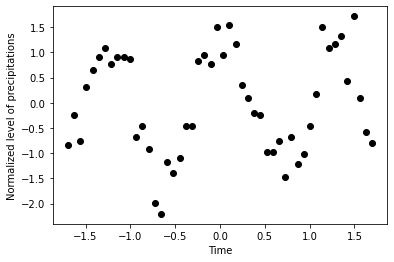

In [9]:
## REAL-WORLD dataset example
## I use the dataset used by Søren Hauberg
from scipy.io import loadmat

## We load the data and use only some of them.
## We subsample the data, which gives us N pairs of (x, y)
M = 1000
data = loadmat('weather_dataset.mat')
# sampling part 
Xtrain = np.arange(0, M, 20)
ytrain = data['TMPMAX'][Xtrain]
N = len(ytrain)
Xtrain = Xtrain.reshape(-1,1)

# print dataset information
print('Xtrain shape', Xtrain.shape)
print('ytrain shape', ytrain.shape)

# also in this case we standardize the data to have zero mean and unit variance
Xtrain = (Xtrain - np.mean(Xtrain)) / np.std(Xtrain)
ytrain = (ytrain - np.mean(ytrain)) / np.std(ytrain)

# and plot it
plt.plot(Xtrain, ytrain, 'o', color='black')
plt.ylabel('Normalized level of precipitations')
plt.xlabel('Time')
plt.show()

# we shall also define the test set, that is the range of XTest point we want to 
# use to compute the mean and the variance
Xtest = np.linspace(-2, 2, M).reshape(-1,1)

<font color='blue'> Tasks:
1. Choose a value for the three hyperparameters and do a noisy Gaussian Porcess regression on this dataset. Plot the mean and the 2-standard deviation interval. Plot also 10 samples form the posterior. If you think that the fit you get is not the perfect one, try to change the values of the hyperparameters.

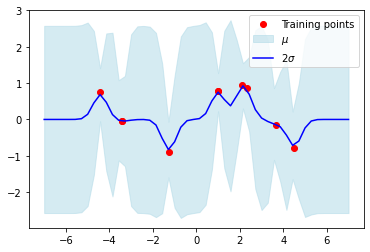

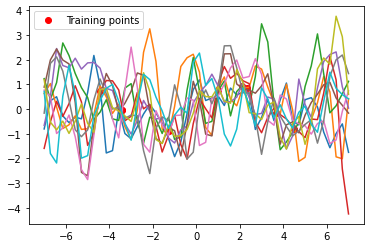

In [26]:
## as you did above, you should define the hyperparameters of your kernel 
## and fit a noisy GP on this dataset

lengthscale = 0.3273673469387755
kernel_variance = 1.6575510204081634
noise_variance = 0.1437142857142857

n_samples = 10

# we start computing the kernels (I am using s instead of * in the kernel variable names)
K = squared_exponential_kernel(Xtrain, Xtrain, lengthscale, kernel_variance)
Ks = squared_exponential_kernel(Xtrain, Xtest, lengthscale, kernel_variance)
Kss = squared_exponential_kernel(Xtest, Xtest, lengthscale, kernel_variance)

# compute the cholesky decomposition
L = np.linalg.cholesky(K + noise_variance * np.identity(len(Xtrain)))

# compute alpha
alpha = np.linalg.solve(L.T, np.linalg.solve(L,ytrain))

# compute the mean function
mu = Ks.T @ alpha

# compute v
v = np.linalg.solve(L, Ks)

# compute the covariance
covariance =  Kss - (v.T @ v)


# we get the standard deviation from the covariance matrix
std = np.sqrt(np.diag(covariance))


## now we can plot the mean function with the standard deviation intervals
plt.plot(Xtrain, ytrain, 'ro', label='Training points')
plt.gca().fill_between(Xtest.flat, mu.reshape(-1) - 2 * std, mu.reshape(-1) + 2 * std,  color='lightblue', alpha=0.5, label=r"$\mu$")
plt.plot(Xtest, mu, 'blue', label=r"$2\sigma$")
plt.legend()
plt.show() 


## SAMPLE FROM THE POSTERIOR
samples_from_the_posterior = np.random.multivariate_normal(
    mean=mu.reshape(-1), cov=covariance, 
    size=n_samples)

# PLOT THEM
plt.plot(Xtrain, ytrain, 'ro', label='Training points')
#plt.gca().fill_between(Xtest.flat, mu - 2 * std, mu + 2 * std, color='lightblue', alpha=0.5)
#plt.plot(Xtest, mu, 'blue')
for sample_id in range(n_samples):
    plt.plot(Xtest, samples_from_the_posterior[sample_id], linestyle='-')
plt.legend()
plt.show()  

<font color='blue'> Tasks:
2. Define an interval for the three hyperparameters. Look at you data and find a reasonable range for each of them that is worth to investigate. Use $\approx 50$ values for each hyperparameter, because otherwise the process will becomes really time consuming. Substitute the values you obtained in the code you wrote before, and check the fitting.

In [27]:
# maximization of the log-likelihood
n_of_tests = 50

possible_lengthscales = np.linspace(0.001, 2, n_of_tests)
possible_output_variances = np.linspace(0.01,3, n_of_tests)
possible_noise_variances = np.linspace(0.001, 1, n_of_tests)

best_log_likelihood = -100000
best_lengthscale = 0
best_output_var = 0
best_noise_var = 0

## simple grid search: FOR LOOPS!
for lengthscale in possible_lengthscales:
    for output_var in possible_output_variances:
        for noise_var in possible_noise_variances:
            ### INSERT YOUR CODE HERE
            K = squared_exponential_kernel(Xtrain, Xtrain, lengthscale, output_var)
            L = np.linalg.cholesky(K + noise_var * np.eye(len(Xtrain)))
            alpha_ = np.linalg.solve(L.T, np.linalg.solve(L, ytrain))
            
            # we have to compute the sum of the diagonal of the L matrix
            log_likelihood = -N/2*np.log(2*np.pi) - 0.5 * ytrain.T @ alpha_ - np.sum(np.log(L.diagonal()))

            
            if log_likelihood > best_log_likelihood:
                # update params
                best_log_likelihood = log_likelihood
                best_lengthscale = lengthscale
                best_output_var = output_var
                best_noise_var = noise_var
                
print("Max log-likelihood: ", best_log_likelihood)
print("Best lengthscale: ", best_lengthscale)
print("Best output variance: ", best_output_var)
print("Best noise variance: ", best_noise_var)

Max log-likelihood:  1.299714369787658
Best lengthscale:  2.0
Best output variance:  0.986326530612245
Best noise variance:  0.001


#### Additional exercise: testing extrapolation of Gaussian Process using only a squared-exponential kernel

An interesting things to investigate is if the Gaussian Process with squared-exponential kernel is able to extrapolate out of the range of the training set. We will use the hyperparameters that we found out in the previous step and we define the test set to be from -5 to 5.

<font color='blue'> Tasks:
1. Define your test set to contain $x$s from -5 to 5 and re-fit the Gaussian Process. Plot the mean and 2-standard deviation interval and also some samples.

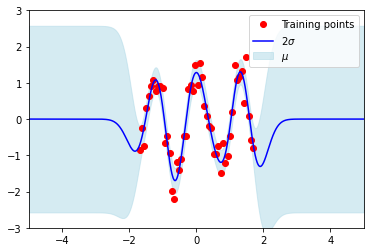

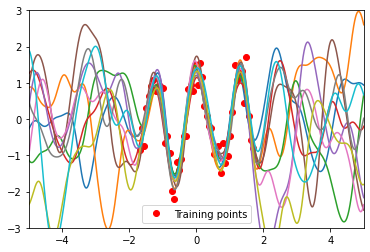

In [12]:
## what happen if we try to model a bigger test set
new_Xtest = np.linspace(-5, 5, M).reshape(-1,1)

lengthscale = 0.3273673469387755
kernel_variance = 1.6575510204081634
noise_variance = 0.1437142857142857

# we start computing the kernels (I am using s instead of * in the kernel variable names)
K = squared_exponential_kernel(Xtrain, Xtrain, lengthscale, kernel_variance)
Ks = squared_exponential_kernel(Xtrain, new_Xtest, lengthscale, kernel_variance)
Kss = squared_exponential_kernel(new_Xtest, new_Xtest, lengthscale, kernel_variance)

# compute the cholesky decomposition
L = np.linalg.cholesky(K + noise_variance * np.eye(len(Xtrain)))

# compute alpha
alpha = np.linalg.solve(L.T, np.linalg.solve(L,ytrain))

# compute the mean function
mu = Ks.T @ alpha

# compute v
v = np.linalg.solve(L, Ks)

# compute the covariance
covariance = Kss - (v.T @ v)

# we get the standard deviation from the covariance matrix
std = np.sqrt(np.diag(covariance))

#plot
## now we can plot the mean function with the standard deviation intervals
plt.plot(Xtrain, ytrain, 'ro', label='Training points')
plt.gca().fill_between(new_Xtest.flat, mu.reshape(-1) - 2 * std, mu.reshape(-1) + 2 * std,  color='lightblue', alpha=0.5, label=r"$\mu$")
plt.plot(new_Xtest, mu, 'blue', label=r"$2\sigma$")
plt.axis([-5, 5, -3, 3])
plt.legend()
plt.show() 


## SAMPLE FROM THE POSTERIOR
samples_from_the_posterior = np.random.multivariate_normal(
    mean=mu.reshape(-1), cov=covariance, 
    size=n_samples)


# PLOT THEM
plt.plot(Xtrain, ytrain, 'ro', label='Training points')
#plt.gca().fill_between(Xtest.flat, mu - 2 * var, mu + 2 * var, color='lightblue', alpha=0.5)
#plt.plot(Xtest, mu, 'blue')
for sample_id in range(n_samples):
    plt.plot(new_Xtest, samples_from_the_posterior[sample_id], linestyle='-')
plt.axis([-5, 5, -3, 3])
plt.legend()
plt.show()  

## Optimization using Gradient Descent

Another possibility is to optimize the three hyperparameters using Gradient Descent. Here, there are several options in order to calculate the gradient:
1. Do it manually like in the good old days, here checking if you did it correctly by a finite difference approximation would properly be good
2. Use automatic diferentiation for example in PyTorch or TensorFlow<br>
To use PyTorch, we would have to compute all the operations that involves our hyperparameters using PyTorch, there is a bit of skeleton code for this below.
3. Just ignore it and have scipy.optimize automatically estimate the gradient by finite difference a good algorithm for this is L-BFGS.

<font color='blue'> Tasks:
1. Implement gradient descent for optimizing kernel hyperparameters, by either of the approaches above

Experiment a bit with finding hyperparameters do you encounter any problems? - if so what appears to be happening and can you do something to circumvent the problem?
</font>

torch.Size([50, 1])


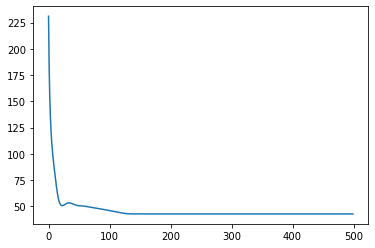

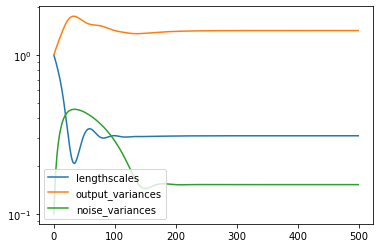

lengthscale = 0.31051257252693176
output_variances = 1.4276467561721802
noise_variances = 0.15291912853717804
NLL = 42.80665588378906


In [13]:
#using PyTorch gradient descent (BFGS would likely be better)
import torch
from torch import nn

torch.set_default_tensor_type(torch.FloatTensor)

def squared_exponential_kernel_torch(x, y, lengthscale, variance):
    x = x.squeeze(1).expand(x.size(0), y.size(0))
    y = y.squeeze(0).expand(x.size(0), y.size(0))
    sqdist = torch.pow(x-y, 2)
    k = variance * torch.exp(-0.5 * sqdist * (1/lengthscale**2))  # NxM
    return k

# tranform our training set in Tensor
Xtrain_tensor = torch.from_numpy(Xtrain).float()
ytrain_tensor = torch.from_numpy(ytrain).float()


### YOUR CODE HERE
# we should define our hyperparameters as torch parameters where we keep track of
# the operations to get the gradients from them
# we should define our hyperparameters as torch parameters where we keep track of
# the operations to get hte gradients from them
lengthscale = nn.Parameter(torch.tensor(1.0), requires_grad=True)
output_variance = nn.Parameter(torch.tensor(1.0), requires_grad=True)
noise_variance = nn.Parameter(torch.tensor(0.1), requires_grad=True)
learning_rate = 0.03
iterations = 500
# we use Adam as optimizer
optim = torch.optim.Adam([lengthscale, output_variance, noise_variance], lr=learning_rate)

# optimization loop using the log-likelihood that involves the cholesky decomposition (this at the time of implmentation was still flawed in PyTorch)
nlls = []
lengthscales = []
output_variances = []
noise_variances = []
print(ytrain_tensor.shape)
for i in range(iterations):
    # assert noise_variance >= 0, f"ouch! {i, noise_variance}"
    optim.zero_grad()
    K = squared_exponential_kernel_torch(Xtrain_tensor, Xtrain_tensor, lengthscale,
                                         output_variance) + noise_variance * torch.eye(N)
    L = torch.linalg.cholesky(K)
    _alpha_temp = torch.linalg.solve(L, ytrain_tensor)
    _alpha = torch.linalg.solve(L.t(), _alpha_temp)
    nll = N / 2 * torch.log(torch.tensor(2 * np.pi)) + 0.5 * torch.matmul(ytrain_tensor.transpose(0, 1),
                                                                          _alpha) + torch.sum(torch.log(torch.diag(L)))

    nll.backward()
    # for param in [loglambda, logtheta, logvar]:
    #     torch.nn.utils.clip_grad_norm_(param, .05)
    nlls.append(nll.item())
    lengthscales.append(lengthscale.item())
    output_variances.append(output_variance.item())
    noise_variances.append(noise_variance.item())
    optim.step()

    # projected in the constraints
    for p in [lengthscale, output_variance]:
        pass#p.data.clamp_(1e-5)

plt.figure()
plt.plot(range(iterations), nlls, label='nll')
plt.figure()
plt.semilogy(range(iterations), lengthscales, label='lengthscales')
plt.semilogy(range(iterations), output_variances, label='output_variances')
plt.semilogy(range(iterations), noise_variances, label='noise_variances')
plt.legend()
plt.show()

print('lengthscale =', lengthscale.item())
print('output_variances =', output_variance.item())
print('noise_variances =', noise_variance.item())
print('NLL =', nll.item())

In [14]:
#Using scipy optimize L-BFGS with finite difference approximation of gradients
from scipy.optimize import minimize
def compute_neg_loglik(parameters, Xtrain, ytrain):
    lengthscale, output_var, noise_var = parameters
    K = squared_exponential_kernel(Xtrain, Xtrain, lengthscale, output_var) # n_train x n_train
    L = np.linalg.cholesky(K + noise_var * np.eye(*K.shape))
    alpha = np.linalg.solve(L.T, np.linalg.solve(L, ytrain))
    log_likelihood = - 0.5 * ytrain.T @ alpha - np.log(np.diag(L)).sum() - len(ytrain)/2*np.log(2*np.pi)
    return - log_likelihood.squeeze()
lengthscale = .2
kernel_variance = 1
noise_variance = 0.45
bounds = ((1e-3, 1e2), (1e-3, 1e2), (1e-3, 1e2))
initial_parameters = np.array([lengthscale, kernel_variance, noise_variance])
args = (Xtrain, ytrain)
result = minimize(compute_neg_loglik, initial_parameters, args, method='l-bfgs-b', bounds=bounds)
print(f'parameters: {result.x}, NLL={result.fun}')


parameters: [0.31051271 1.42764924 0.15291916], NLL=42.806656032045694


<font color='blue'> The procedure can be somewhat sensitive to the initial parameters, in particular (though that does not seem to be so bad in this case) we can get stuck in a situation where the noise covariance is very low (the cost function seems to not really depend on it - low gradient). The BFGS approach is typically better and more difficult to make fail in this regard as it uses second order derivaties. The stability can be improved by implementing a prior on the noise covariance which was also mentioned in the notes, typically you do have some apriori expectation that there is at least some measurement noise (the value of which is often also known at least to some extent).